# Quality sleep

In our fuzzy system, we would have duration and breathing as inputs to determine the quality of our sleep. 

# Fuzzy Control System

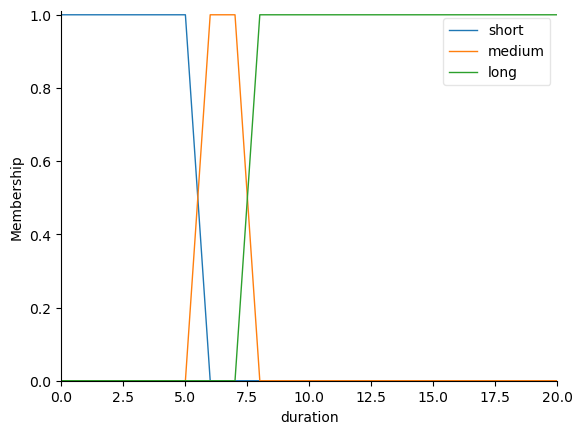

In [84]:
import numpy as np
import skfuzzy as fuzz
import scipy
import networkx
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
duration = ctrl.Antecedent(np.arange(0, 21, 1), 'duration')
breathing = ctrl.Antecedent(np.arange(0, 11, 1), 'breathing')
quality = ctrl.Consequent(np.arange(0, 11, 1), 'quality')

# Custom membership functions for 'duration' (short, medium, long)
duration['short'] = fuzz.trapmf(duration.universe, [0, 0, 5, 6])
duration['medium'] = fuzz.trapmf(duration.universe, [5, 6, 7, 8])
duration['long'] = fuzz.trapmf(duration.universe, [7, 8, 20, 20])

# Custom membership functions for 'breathing' (bad, okay, good)
breathing['poor'] = fuzz.trimf(breathing.universe, [0, 0, 6])
breathing['average'] = fuzz.trimf(breathing.universe, [4, 6, 8])
breathing['good'] = fuzz.trimf(breathing.universe, [6, 10, 10])


# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)

duration.view()

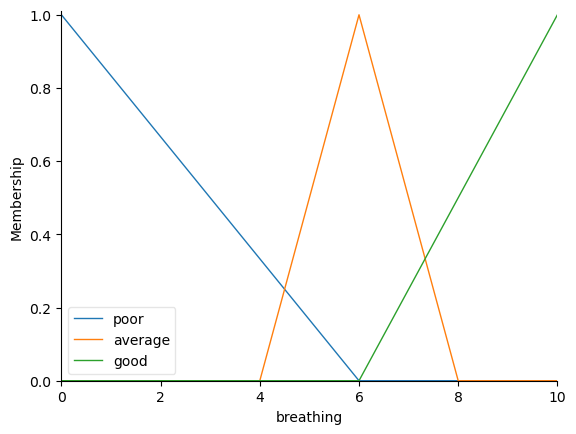

In [85]:
poor_rule = ctrl.Rule(
    (duration['short'] | breathing['poor']),
    quality['poor']
)
avg_rule = ctrl.Rule(
    (duration['medium'] & (breathing['average'] | breathing['good']) |
     (duration['long'] & breathing['average'])),
    quality['average']
)
good_rule = ctrl.Rule(
    (duration['long'] & breathing['good']),
    quality['good']
)

breathing.view()

In [86]:
quality_ctrl = ctrl.ControlSystem([poor_rule, avg_rule, good_rule])

In [87]:
quality_sleep = ctrl.ControlSystemSimulation(quality_ctrl)

Quality value: 1.8055555555555558
Quality label: poor


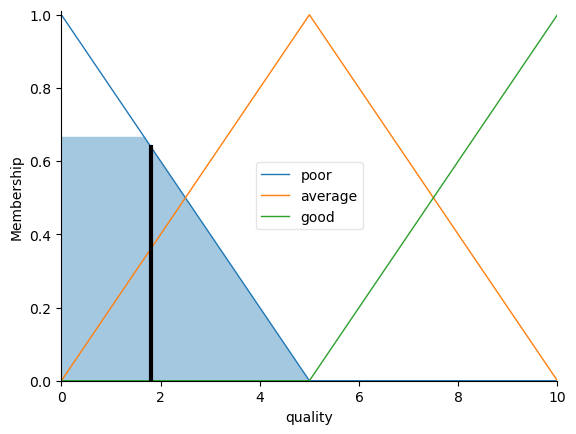

In [88]:
# sleepduration  in hours
quality_sleep.input['duration'] = 9
quality_sleep.input['breathing'] = 2

# Crunch the numbers
quality_sleep.compute()

quality_value = quality_sleep.output['quality']
print(f"Quality value: {quality_value}")

# Once computed, we can view the result as well as visualize it.
if quality_value <= 2.5:
    quality_label = 'poor'
elif quality_value <= 7.5:
    quality_label = 'average'
else:
    quality_label = 'good'

print(f"Quality label: {quality_label}")
quality.view(sim=quality_sleep)